In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_batches = pd.read_excel('mixed_batches_test.xlsx')

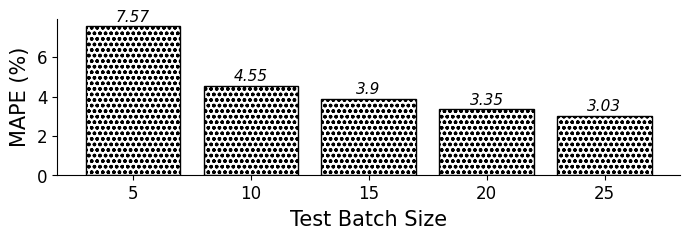

In [3]:
# ref: https://www.python-graph-gallery.com/5-control-width-and-space-in-barplots
mapes = df_batches['MAPE']
batch_sizes = df_batches['Batch_Size']
#labels = df_batches['Label']

x_pos = [0, 1, 2, 3, 4]

fig, ax = plt.subplots()
fig.set_tight_layout(True)

width = 7
height = 2.5
fig.set_size_inches(width, height)

bars = ax.bar(x_pos, mapes, fill=False, hatch='ooo')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.xticks(x_pos, batch_sizes)

# https://stackoverflow.com/questions/72970649/how-to-label-bars-with-multiple-custom-values
for c in ax.containers:
    #print(c)
    ax.bar_label(c, label_type='edge', padding=1, fontsize=11, fontstyle='italic')

ax.tick_params(axis='both', which='major', labelsize=12)

plt.xlabel("Test Batch Size", labelpad=5, fontsize=15)
#rotation: https://stackoverflow.com/questions/42100114/rotating-title-of-y-axis-to-be-horizontal-in-matplotlib
# labelpad: https://stackoverflow.com/questions/21539018/how-to-change-separation-between-tick-labels-and-axis-labels-in-matplotlib
plt.ylabel("MAPE (%)", labelpad=5, fontsize=15)

fig.savefig('Mixed Batch Sizes.png', bbox_inches='tight', dpi=300)

plt.show()

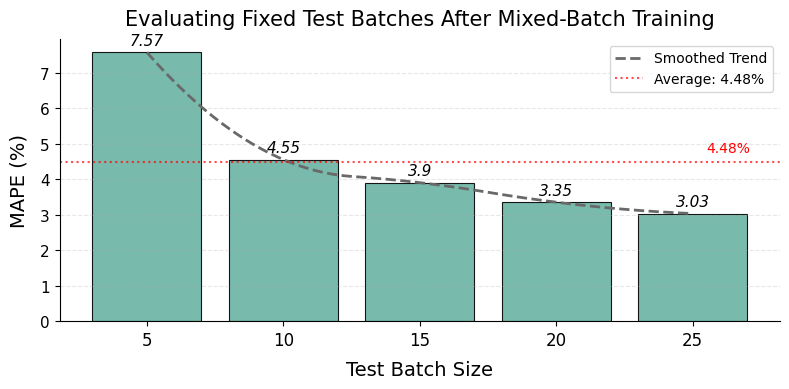

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

mapes = df_batches['MAPE'].values
batch_sizes = df_batches['Batch_Size'].values
x_pos = np.arange(len(mapes))

fig, ax = plt.subplots()
fig.set_tight_layout(True)
fig.set_size_inches(8, 4)

# 🔹 Enhanced bar plot with soft color and rounded edges
bars = ax.bar(x_pos, mapes, color='#69b3a2', edgecolor='black', linewidth=0.6)

# Rounded bar tops (optional)
for bar in bars:
    bar.set_linewidth(0.8)
    bar.set_alpha(0.9)

# 🔹 Add labels above bars
for c in ax.containers:
    ax.bar_label(c, label_type='edge', padding=3, fontsize=11, fontstyle='italic', color='black')

# 🔹 Spline-based smoothed trend line
x_smooth = np.linspace(x_pos.min(), x_pos.max(), 200)
spline = make_interp_spline(x_pos, mapes, k=2)
y_smooth = spline(x_smooth)
ax.plot(x_smooth, y_smooth, linestyle='--', color='dimgray', linewidth=2, label='Smoothed Trend')

# 🔹 Average line + annotation
mean_mape = np.mean(mapes)
ax.axhline(mean_mape, color='red', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Average: {mean_mape:.2f}%')
ax.text(x_pos[-1] + 0.1, mean_mape + 0.2, f"{mean_mape:.2f}%", color='red', fontsize=10, va='bottom')

# 🔹 X-axis and Y-axis formatting
ax.set_xticks(x_pos)
ax.set_xticklabels(batch_sizes, fontsize=12)
ax.set_xlabel("Test Batch Size", fontsize=14, labelpad=8)
ax.set_ylabel("MAPE (%)", fontsize=14, labelpad=8)
ax.tick_params(axis='y', labelsize=11)

# 🔹 Add light y-grid for readability
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

# 🔹 Legend
ax.legend(loc='upper right', fontsize=10)

# 🔹 Optional: add a title
ax.set_title("Evaluating Fixed Test Batches After Mixed-Batch Training", fontsize=15, pad=10)

# Save high-resolution version
fig.savefig('Styled_Mixed_Batch_Sizes_Plot.png', bbox_inches='tight', dpi=300)
plt.show()
